In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.2 MB 3.8 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [9]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
automobile_df.sample(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
139,14.0,8,302.0,140,4638,16.0,74,1,ford gran torino (sw)
66,17.0,8,304.0,150,3672,11.5,72,1,amc ambassador sst
160,17.0,6,231.0,110,3907,21.0,75,1,buick century
172,25.0,4,90.0,71,2223,16.5,75,2,volkswagen dasher
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
291,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw)
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
213,13.0,8,350.0,145,4055,12.0,76,1,chevy c10
318,29.8,4,134.0,90,2711,15.5,80,3,toyota corona liftback
82,23.0,4,120.0,97,2506,14.5,72,3,toyouta corona mark ii (sw)


In [15]:
automobile_df.shape

(392, 7)

In [10]:
automobile_df = automobile_df.replace('?', np.nan)

In [12]:
automobile_df = automobile_df.dropna()

In [14]:
# drop columns that cannot influence prediction of miles-per-gallon (mpg)
automobile_df.drop(['car name', 'origin'], axis=1, inplace=True)

In [16]:
# compute age of car
automobile_df['model year'] = '19' + automobile_df['model year'].astype('str')
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])
automobile_df.drop(['model year'], axis=1, inplace=True)

In [20]:
# make all columns numeric
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [21]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,45.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,42.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,45.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [22]:
def scatter_plot(df, columnX, columnY, nameX, nameY):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(df[columnX], df[columnY])
    
    plt.xlabel(nameX)
    plt.ylabel(nameY)

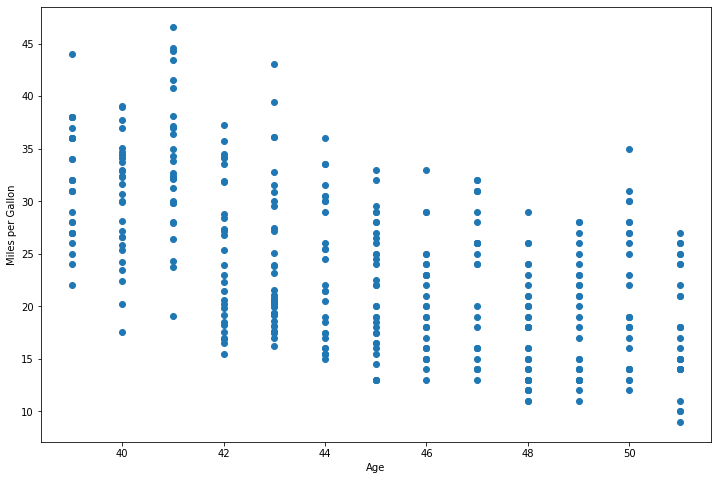

In [23]:
scatter_plot(automobile_df, 'age', 'mpg', 'Age', 'Miles per Gallon')

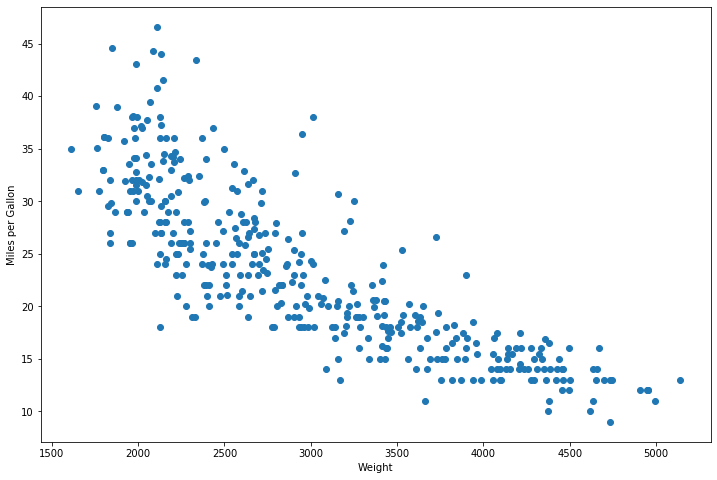

In [24]:
scatter_plot(automobile_df, 'weight', 'mpg', 'Weight', 'Miles per Gallon')

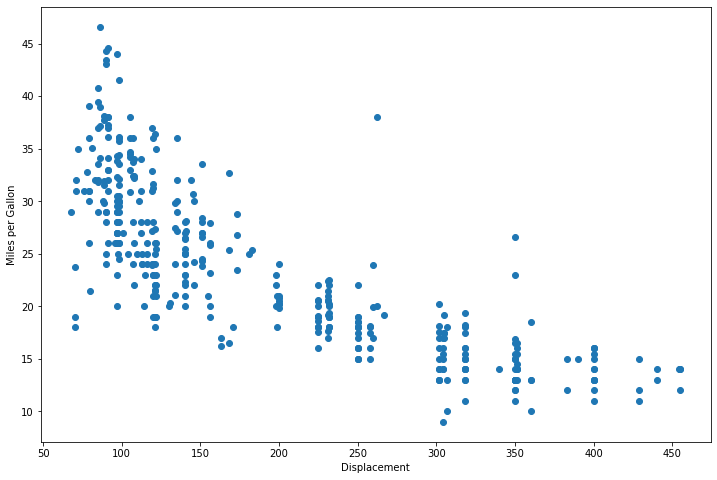

In [25]:
scatter_plot(automobile_df, 'displacement', 'mpg', 'Displacement', 'Miles per Gallon')

In [26]:
automobile_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


In [27]:
# shuffle records
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

In [28]:
automobile_df.to_csv('datasets/processed-auto-mpg.csv', index=False)